# `pandas` Review and Scraping City Populations
* `enumerate`
* Floating-point arithmetic
* `pandas`
* Scraping city population data
* Worksheet

## `enumerate`
* A way to traverse by index and element at the same time

In [1]:
list_of_dogs = ['Trixie', 'Lilly', 'Violet', 'Rocket']
for i, dog in enumerate(list_of_dogs):
    print(str(i) + ':', dog)

0: Trixie
1: Lilly
2: Violet
3: Rocket


<font color=red>***`enumerate` takes an optional argument if we don't want to start at `0`:***

In [2]:
for i, dog in enumerate(list_of_dogs, 1):
    print(str(i) + ':', dog)

1: Trixie
2: Lilly
3: Violet
4: Rocket


## Floating-point arithmetic in computers

<font color=red>***You may remember this from 131:***

In [3]:
0.1 + 0.2 + 0.3 + 0.4

1.0

In [4]:
0.4 + 0.3 + 0.2 + 0.1

0.9999999999999999

<font color=red>***Computers can only exactly represent numbers that are powers of 2, so roundoff errors are inevitable. They can accumulate and become a big problem. And they've caused problems in the hw tests in the past, also. I think I've solved them all, but maybe not...***

## `pandas` review

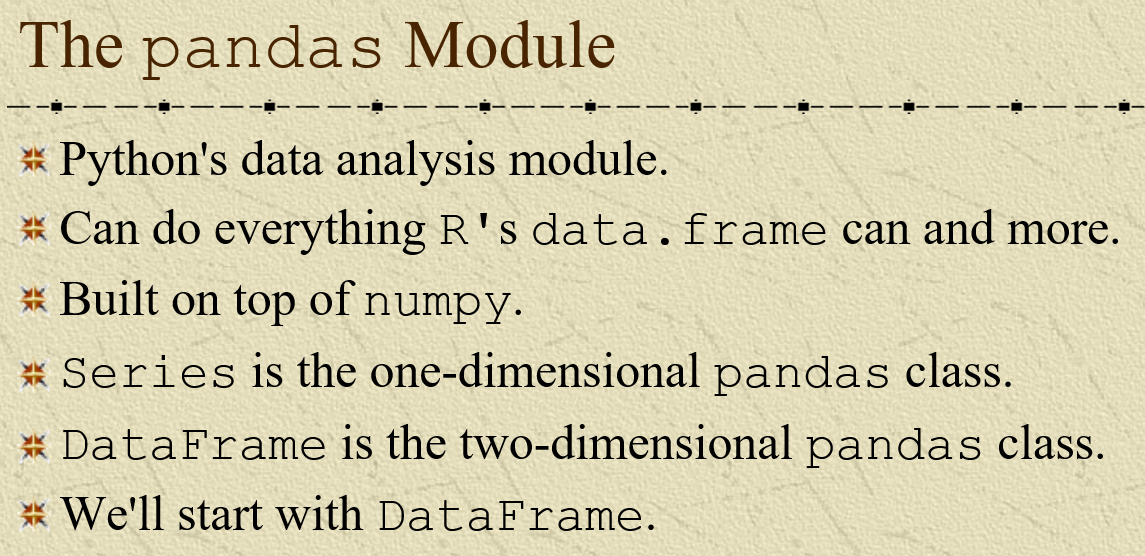

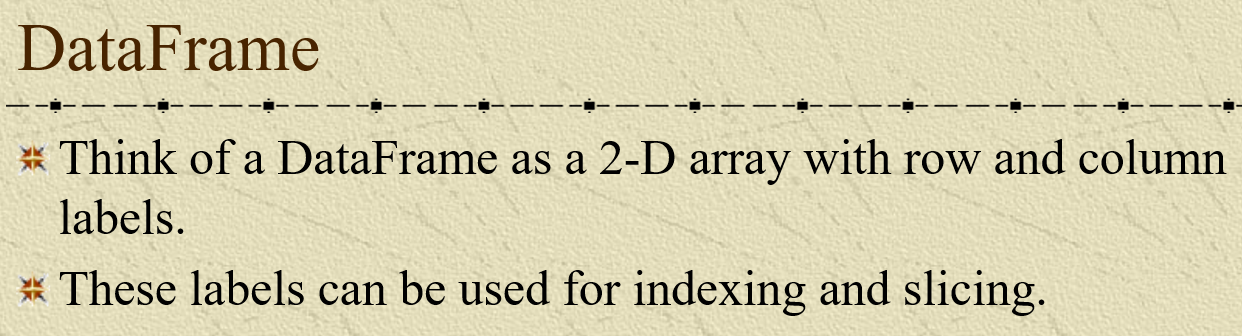

In [2]:
import pandas as pd, numpy as np

In [3]:
index = ['one', 'two', 'three']
columns = ['a', 'b', 'c', 'd']
data = np.arange(12).reshape(3, 4)
df = pd.DataFrame(data, index, columns)
df

a  b   c   d
one    0  1   2   3
two    4  5   6   7
three  8  9  10  11

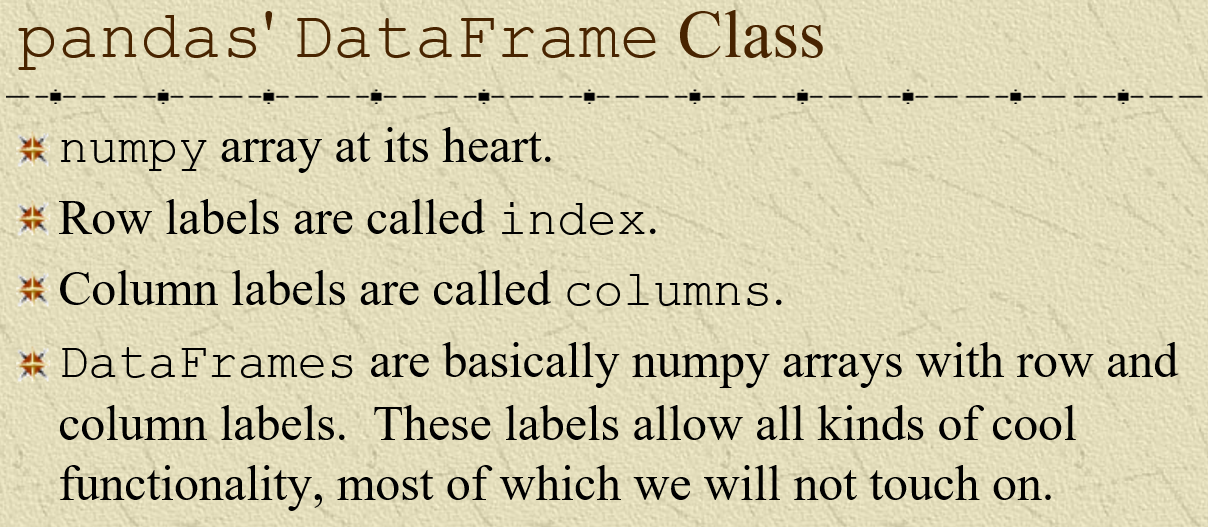

<font color=red>***I like to think of `DataFrames` as being like a toaster. They only have a few components and a couple of knobs. The three main components are the row labels, the column labels, and the data. The labels are stored in the `index` and `columns`. We access the data using two 'knobs', the `loc` and `iloc` attributes.***

In [4]:
df.index

Index(['one', 'two', 'three'], dtype='object')

In [5]:
df.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

<font color=red>***We can see that they are both `Index` objects, which are just a sequence type. They are immutable (we can't assign to a position), but it's easy to replace them:***

In [6]:
df.columns = ['A', 'B', 'C', 'D']
df

A  B   C   D
one    0  1   2   3
two    4  5   6   7
three  8  9  10  11

<font color=red>***What happens if we don't specify labels?***

In [7]:
df2 = pd.DataFrame(data)
df2

0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11

<font color=red>***Defaults are integers.***

<font color=red>***`DataFrames` are wrappers, built on top of `numpy` arrays. If we change the array, we change the frame. If we have used the same array for two frames, we can change two at once, which is dangerous:***

In [8]:
data[2, 3] = 777
df

A  B   C    D
one    0  1   2    3
two    4  5   6    7
three  8  9  10  777

In [9]:
df2

0  1   2    3
0  0  1   2    3
1  4  5   6    7
2  8  9  10  777

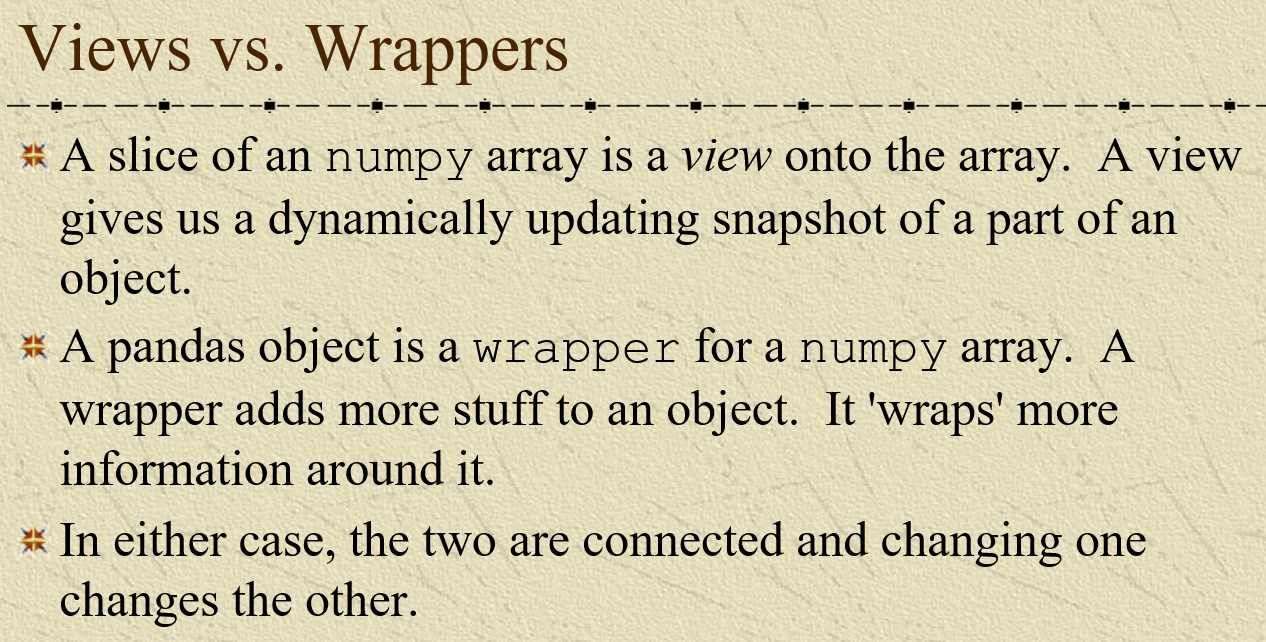

<font color=red>***The `iloc` attribute is used for integer indexing:***

In [10]:
df.iloc[0, 0] = 888
df

A  B   C    D
one    888  1   2    3
two      4  5   6    7
three    8  9  10  777

<font color=red>***As usual, slices are right-side exlusive:***

In [11]:
df.iloc[:2, :2]

A  B
one  888  1
two    4  5

<font color=red>***The `loc` attribute is used for label indexing:***

In [12]:
df.loc['one', 'A'] = 999
df

A  B   C    D
one    999  1   2    3
two      4  5   6    7
three    8  9  10  777

<font color=red>***But it's right-side inclusive!***

In [13]:
df.loc[:'three', :'C']

A  B   C
one    999  1   2
two      4  5   6
three    8  9  10

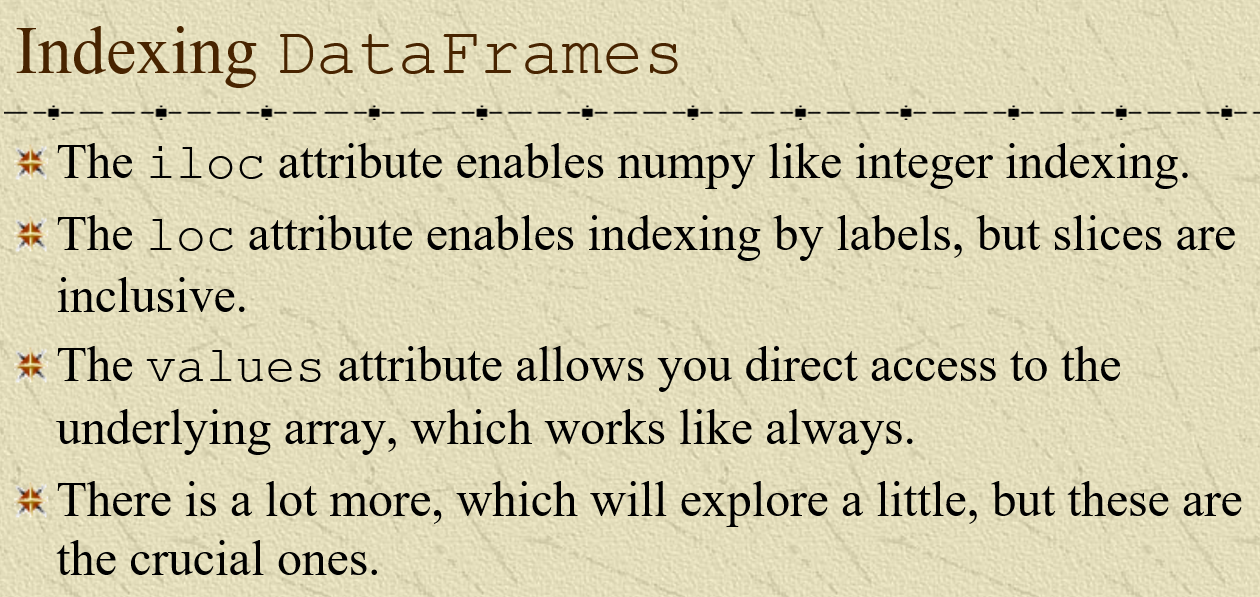

<font color=red>***Grabbing a column:***

In [14]:
df['B']

one      1
two      5
three    9
Name: B, dtype: int32

In [15]:
df.B

one      1
two      5
three    9
Name: B, dtype: int32

<font color=red>***Grabbing a row:***

In [16]:
df.loc['two']

A    4
B    5
C    6
D    7
Name: two, dtype: int32

<font color=red>***`pandas` has LOTS of killer functionality built in, but we won't explore most of it. Here's an example:***

In [17]:
df[['C', 'A']]

C    A
one     2  999
two     6    4
three  10    8

<font color=blue>***Is that a view or a new frame? How would you figure that out?***

<font color=red>***Transposing a `DataFrame`:***

In [18]:
df.T

one  two  three
A  999    4      8
B    1    5      9
C    2    6     10
D    3    7    777

<font color=blue>***What is the type of a row or a column of a `DataFrame`?***

In [19]:
type(df.B)

pandas.core.series.Series

<font color=red>***Using `Series` to calculate Pearson's $r$ with the corr method:***

In [20]:
df.A.corr(df.B)

-0.8642758841444981

In [21]:
s = pd.Series([12, 11, 10, 9], [1, 2, 3, 4])

In [22]:
s.corr(df.B)

nan

<font color=red>***Both `Series` have to have the same index, so let's give them both the default index:***

In [23]:
pd.Series(s.values).corr(pd.Series(df.B.values))

-1.0

<font color=red>***Let's review a couple of other statistices:***

In [24]:
s.mean()

10.5

In [25]:
s.std(ddof=0)

1.118033988749895

<font color=blue>***What does the `ddof=0` mean? <font color=red>That we are doing population statistics. <font color=blue>How often do we do this? <font color=red>Basically never. <font color=blue>What do we do instead? Why?***

In [26]:
s.std(ddof=1)

1.2909944487358056

# City populations worksheet

<font color=red>***We will be working with websites that have this format:***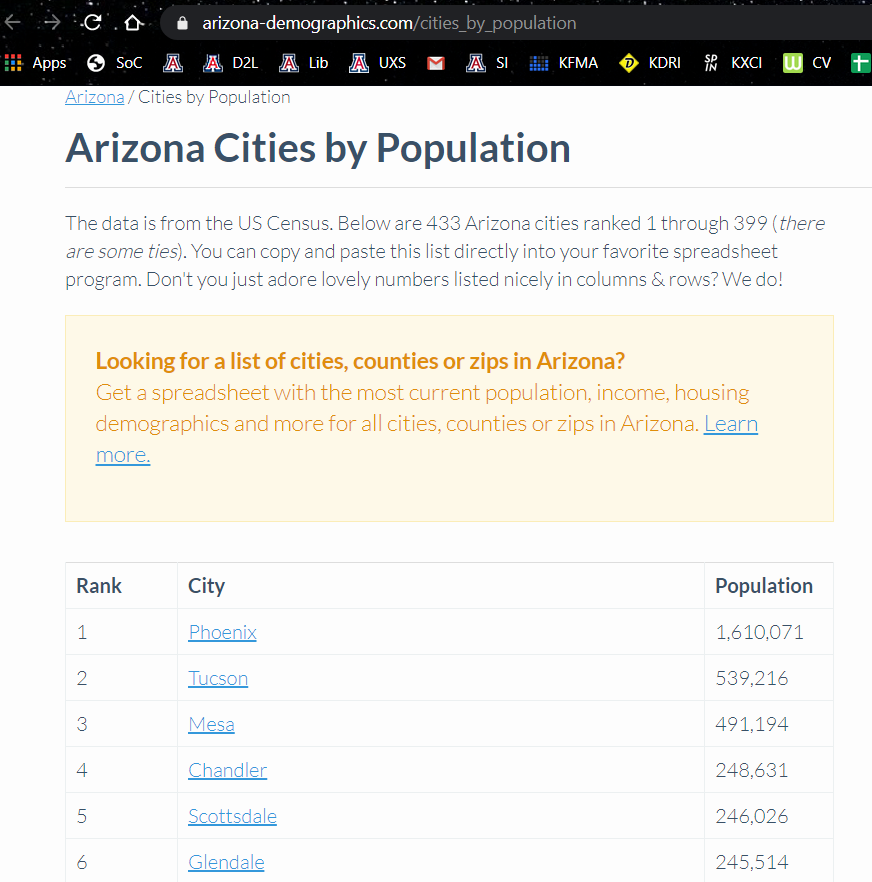

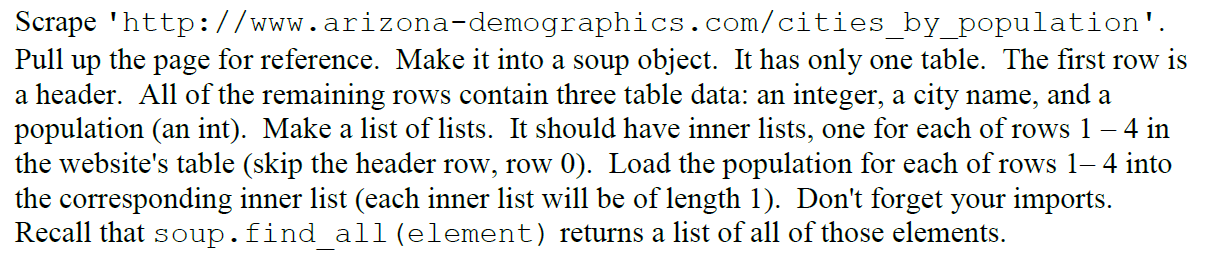

In [31]:
import requests
from bs4 import BeautifulSoup

In [32]:
url = 'https://www.arizona-demographics.com/cities_by_population'
r = requests.get(url)
r.content

b'<!DOCTYPE html>\n<html>\n<head>\n\t<meta charset="utf-8">\n  <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\t<meta name="viewport" content="width=device-width, initial-scale=1">\n\t\n\n\t<meta name="description" content="Get a list of Arizona cities by population based on Census 2010 data.">\n\t<link rel="canonical" href="https://www.arizona-demographics.com/cities_by_population">\n\t<meta name="stripe-key" content="pk_cFXCpyE0vWnInhFbr1v1adGyuKetq" />\n\n\t<link href=\'//fonts.googleapis.com/css?family=Lato:100,300,700\' rel=\'stylesheet\'>\n\t<link rel="stylesheet" media="all" href="https://d1llprvlh6ol41.cloudfront.net/assets/application-79eff98be870aabe56633b8388a0cdc39f6b9f17f02617667aaa269d6881ba3f.css" />\n\n  <meta name="csrf-param" content="authenticity_token" />\n<meta name="csrf-token" content="sy6EN3Ucr5y/TLQKcmmhOFg/F7ZFIW60eyMdC1t32iWUBL8y6Ig65qAHtB9PUriXehtBWpTjc09YB+Qc83MQ0g==" />\n  <title>Arizona Cities by Population </title>\n\t<!-- Global site tag (gtag.j

In [33]:
soup = BeautifulSoup(r.content)
tables = soup.find_all('table')
len(tables)

1

In [34]:
lol = []
for tr in soup.find_all('tr')[1:5]:
    td = tr.find_all('td')[2]
    lol.append([int(td.get_text().replace(',', ''))])
    

In [35]:
lol

[[1610071], [539216], [491194], [248631]]

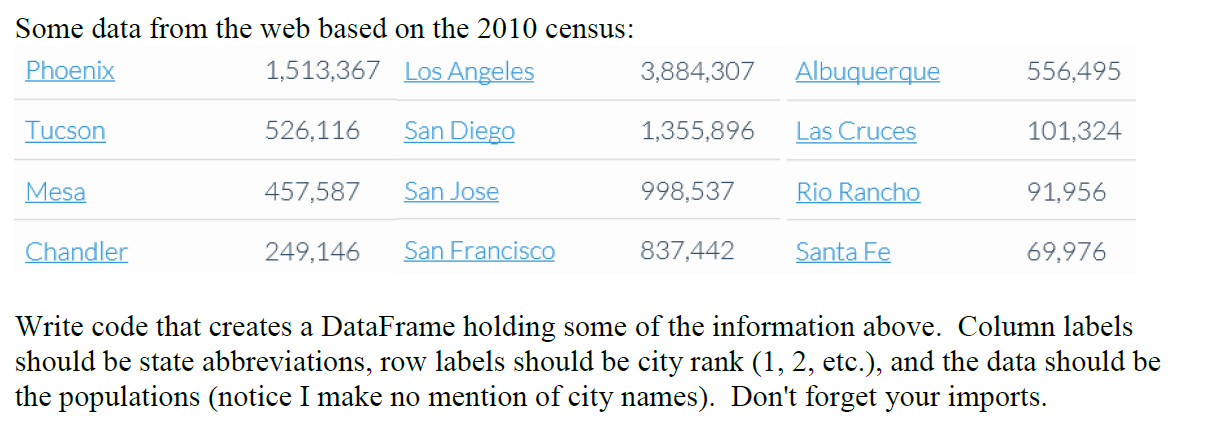

In [36]:
index = [1, 2]
columns = ['AZ', 'CA', 'NM']
data = [[1513367, 3884307, 556495],
        [ 526116, 1355896, 101324]]
df = pd.DataFrame(data, index, columns)
df

AZ       CA      NM
1  1513367  3884307  556495
2   526116  1355896  101324

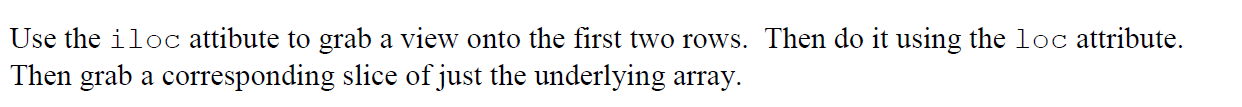

In [37]:
df.iloc[:, :2]

AZ       CA
1  1513367  3884307
2   526116  1355896

In [38]:
df.loc[:, :'CA']

AZ       CA
1  1513367  3884307
2   526116  1355896

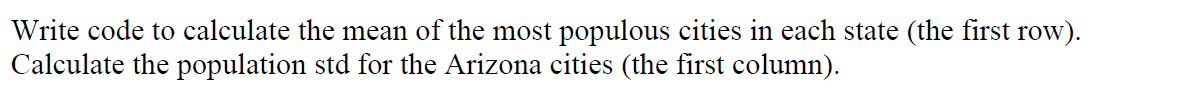

In [39]:
df.loc[1].mean()

1984723.0

In [40]:
df.loc[1].std(ddof=0)

1398860.378043022

In [41]:
df.loc[1].std(ddof=1)

1713247.0738010907